In [3]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [4]:
#EXERCICE 7 
#Montrer que si on centre et standardise les observations (mean 0, std 1) 
#on obitent une formule

from ISLP import load_data
from statsmodels . datasets import get_rdataset
X = get_rdataset ('USArrests').data

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
from sklearn.metrics import pairwise_distances

#dist 
dist_matrix=pairwise_distances(X_scaled, metric="euclidean")**2


In [6]:
#correaltion 

corr_matrix= np.corrcoef(X_scaled)
dissimilarity = 1-corr_matrix

In [7]:
# On extrait la partie triangulaire
i, j = np.triu_indices_from(corr_matrix, k=1)
one_minus_r = 1 - corr_matrix[i, j]
sq_dist = dist_matrix[i, j]


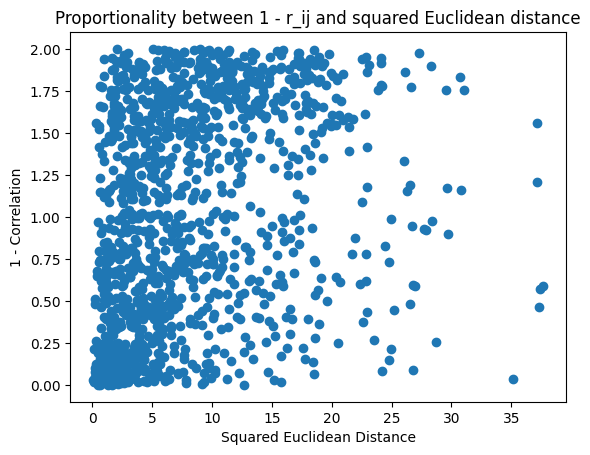

In [8]:
import matplotlib.pyplot as plt
plt.scatter(sq_dist, one_minus_r)
plt.xlabel("Squared Euclidean Distance")
plt.ylabel("1 - Correlation")
plt.title("Proportionality between 1 - r_ij and squared Euclidean distance")
plt.show()


In [ ]:
#ex 10 
#on  veit 3 classes de 20 obs chacunes et 50 vb
np.random.seed(0)
n_per_class = 20
K_true = 3

X1= np.random.normal(loc=0, scale=1, size= (20,50))
X2= np.random.normal(loc=3, scale=1, size= (20,50))
X3= np.random.normal(loc=7, scale=1, size= (20,50))

#empile les tableaux les uns sous les autres 
X= np.vstack([X1, X2, X3])
X

#on veut un mean shift, crée nos eighen values, pour le clustering
y_true = np.array([0]*n_per_class + [1]*n_per_class + [2]*n_per_class)
y_true 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

<function matplotlib.pyplot.show(close=None, block=None)>

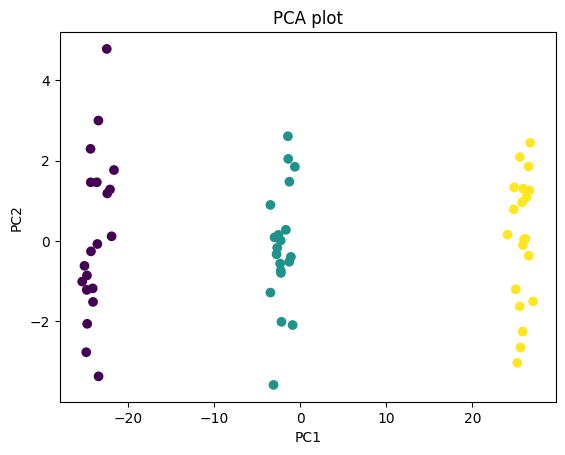

In [10]:
#PCA de 60 obs, plot les 2 PCA, ≠ colors in each c 
pca = PCA(n_components=2)
scores = pca.fit_transform(X)

plt.scatter(scores[:,0],scores[:,1], c=y_true)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA plot')
plt.show

In [11]:
from sklearn.cluster import KMeans

kmeans= KMeans(n_clusters=3, random_state=0)
labels=kmeans.fit_predict(X) 

#compare les labels de K-means aux classes reeles

pd.crosstab(y_true,labels)


col_0,0,1,2
row_0,,,
0,0,0,20
1,20,0,0
2,0,20,0


In [12]:
kmeans= KMeans(n_clusters=2, random_state=0)
labels=kmeans.fit_predict(X) 
pd.crosstab(y_true,labels)

#cluster0 regroupe classe 0 et 1 

col_0,0,1
row_0,,
0,20,0
1,20,0
2,0,20


In [13]:
kmeans = KMeans(n_clusters=4, random_state=0)
labels= kmeans.fit_predict(X) #applique notre k-clustering a notre m 

pd.crosstab(y_true, labels)
#plus il y a de clusters plus nos groupes se divisent, + precis ? 


col_0,0,1,2,3
row_0,,,,
0,0,0,20,0
1,20,0,0,0
2,0,12,0,8


In [14]:
#kmeans = 3 
kmeans_pc = KMeans (n_clusters=3, random_state=0)
labels_pc= kmeans_pc.fit_predict(scores)
pd.crosstab(y_true,labels_pc)


col_0,0,1,2
row_0,,,
0,0,0,20
1,20,0,0
2,0,20,0


In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
#perform kmeans avec k=3 
#pst echelon sd = 1 
scaler= StandardScaler()
X_scaled = scaler. fit_transform (X)

kmeans_pc = KMeans(n_clusters=3, random_state=0)
labels_scaled = kmeans_pc.fit_predict(X_scaled)
pd.crosstab(y_true, labels_scaled)


col_0,0,1,2
row_0,,,
0,0,0,20
1,20,0,0
2,0,20,0
